In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf

In [ ]:
M=1000 #number of paths
N=100   #timesteps

#declare model parameters 파라미터!!!
S0 = 1 #today's strock price
K = 1 #Strike
T = 30/365 #Time to expiry
sig = 0.2 #constant long term volatility
r = 0.05 #constant risk-free rate
dt = T/N

rdt = r*dt
sigsdt = sig * np.sqrt(dt)

In [ ]:
#path 생성
np.random.seed(1234)
def logeuler_price_path(S0, T, sig, dt, N, M):
    S = np.empty([M,N+1])
    rv = np.random.standard_normal((M,N))
    for i in range(M):
        S[i,0] = S0
        for j in range(N):
            S[i,j+1] = S[i,j] * np.exp(((r - 0.5 * sig ** 2) * dt + sig * math.sqrt(dt) * rv[i,j]))
    return S

S=logeuler_price_path(S0, T, sig, dt, N, M)

#bs 모형
np.random.seed(1234)
def bscall(S, K, T, r, sig):
    d1 = (np.log(S/K)+(r+0.5*sig**2)*T)/(sig*np.sqrt(T))
    d2 = (np.log(S/K)+(r-0.5*sig**2)*T)/(sig*np.sqrt(T))
    return S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)

def bsput(S, K, T, r, sig):
    d1 = (np.log(S/K)+(r+0.5*sig**2)*T)/(sig*np.sqrt(T))
    d2 = (np.log(S/K)+(r-0.5*sig**2)*T)/(sig*np.sqrt(T))
    return K*np.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)

#bs look
def bslookcall(S, m, dt, r, sig):
    a1 = (np.log(S/m)+(r+0.5*sig**2)*dt)/(sig*np.sqrt(dt))
    a2 = (np.log(S/m)+(r-0.5*sig**2)*dt)/(sig*np.sqrt(dt))
    a3 = (np.log(S/m)-(r-0.5*sig**2)*dt)/(sig*np.sqrt(dt))

    return S*norm.cdf(a1)-m*np.exp(-r*dt)*norm.cdf(a2)-(S*sig**2)*norm.cdf(-a1)/2*r-np.exp(-r*dt)*((m/S)**(2*r/(sig**2)))*norm.cdf(-a3)


def bslookput(S, Ma, T, r, sig):
    a1 = (np.log(S/Ma)+(r+0.5*sig**2)*dt)/(sig*np.sqrt(dt))
    a2 = (np.log(S/Ma)+(r-0.5*sig**2)*dt)/(sig*np.sqrt(dt))
    a3 = (np.log(S/Ma)-(r-0.5*sig**2)*dt)/(sig*np.sqrt(dt))

    return -S*norm.cdf(-a1)+Ma*np.exp(-r*dt)*norm.cdf(-a2)+(S*sig**2)*norm.cdf(a1)/2*r-np.exp(-r*dt)*((Ma/S)**(2*r/(sig**2)))*norm.cdf(a3)

look_call_bs=[]
look_put_bs=[]

#룩백 플롯(float) 콜
def lookback_min_price_as_strike(S, T, r, sig, M):
    for i in range(M):
         min_price=np.min(S, axis=1)[i]
         np.random.seed(1234)
         st=S[i,-1]
         look_call_bs.append(bslookcall(S[i,-1],min_price,T,r,sig))
    return np.mean(look_call_bs)

#룩백 플롯(float) 풋
def lookback_max_price_as_strike(S, T, r, sig, M):
    for i in range(M):
        max_price=np.max(S, axis=1)[i]
        np.random.seed(1234)
        st=S[i,-1]
        look_put_bs.append(bslookput(st,max_price,T,r,sig))
    return np.mean(look_put_bs)

In [ ]:
a=lookback_min_price_as_strike(S, T, r, sig, M)

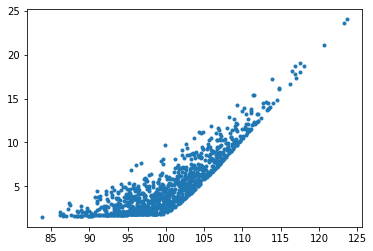

In [ ]:
plt.plot(S[:,-1],a, marker=".",linestyle='none')

In [ ]:
a=lookback_min_price_as_strike(S, T, r, sig, M)
print(a)

[3.220185885649129, 4.881026129095539, 6.197241192524947, 2.3560963151473073, 9.466526399375551, 3.6280258639201475, 3.6101193945437977, 13.78495224671033, 7.415201998640005, 3.4308276684194587, 7.365994606702644, 6.326922012965628, 2.4529081451612864, 2.866559511081036, 1.8379350035522553, 4.716731573068102, 3.8376761008504756, 1.887124134364912, 8.216506465960107, 5.273755018161607, 3.4580785430972902, 3.338836208940217, 10.205123446948987, 12.825085304601405, 4.019571971210913, 2.7845149320891016, 6.208795280169014, 7.200263308793949, 4.218799476100225, 2.541801328155508, 1.7925560802694367, 10.906912515044061, 2.039927240091217, 1.832601348114304, 3.6409063866417566, 1.8214896581662123, 10.50388554738785, 9.857843192021457, 2.6339040064097547, 2.3792010555084957, 8.540532506506324, 2.498658082898176, 7.797871964349718, 13.752460206201864, 8.484763763675662, 2.2686063927869697, 1.8411601300512053, 2.661126239878052, 4.77656047116713, 6.283669137137628, 6.585839640806507, 8.690884524

In [ ]:
b=lookback_max_price_as_strike(S, T, r, sig, M)
print(len(b))

1000


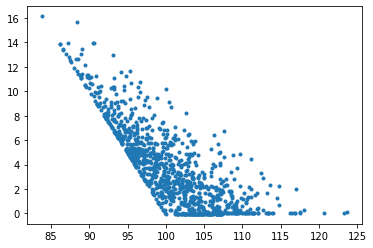

In [ ]:
plt.plot(S[:,-1],b, marker=".",linestyle='none')

In [ ]:
b=lookback_max_price_as_strike(S, T, r, sig, M)
print(b)

[1.3011069103523805, 2.8671799470840065, -0.02063494221469475, 2.919432023474882, -0.00865739309298963, 3.7314853545282025, 7.704931952285284, 0.02630562712437645, 0.05626406048611721, 2.3481342953975783, 0.40472584949138274, -0.009328037078272067, 6.865984519921744, 3.4658686749629535, 3.84378137820997, 0.9232398643651989, 9.240403499065408, 7.8473830293561, 1.4784286649218112, 1.3781877903440147, 3.5490114679802485, 8.529239869843266, 0.006613888650086941, 3.3187995907051677, 2.486136724982547, 4.862600790450196, 1.2215862609004167, 0.027109364519447343, 1.449603115126279, 11.167310472714064, 5.985420362413923, 0.01295317290555098, 3.6677451369705873, 6.0602103080887355, 7.97983326179664, 8.089696724219888, 0.24831198406214222, 2.098501594260121, 5.253660431145326, 8.747394782794542, 2.204402371681486, 5.336531509137727, -0.00953640404298195, 0.026239520786564108, -0.01548174162839272, 4.805427104270807, 5.316982382934962, 6.265345044194094, 1.99513167164915, 0.18901104514870543, 0.1

In [ ]:
#path 생성
np.random.seed(1234)
def logeuler_price_path(S0, T, sig, dt, N, M):
    S = np.empty([M,N+1])
    rv = np.random.standard_normal((M,N))
    for i in range(M):
        S[i,0] = S0
        for j in range(N):
            S[i,j+1] = S[i,j] * np.exp(((r - 0.5 * sig ** 2) * dt + sig * math.sqrt(dt) * rv[i,j]))
    return S

S=logeuler_price_path(S0, T, sig, dt, N, M)

In [ ]:
#이것은 Sequential용 셀이다

my_delta_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    #Sequential 모형의 첫번째에는 input_shape을 넣어줘야 한다
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='tanh')
])
#마지막에 하나의 output을 받는다
#Sequential 안에서는 layer별로 , 를 쓴다
#실행하기 전에 위는 다 comment처리 해버린다

def delta_model():
    price = tf.keras.Input(shape=(1,))
    delta = tf.keras.layers.Dense(32, activation='relu')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(32, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(32, activation='relu')(delta)
    delta = tf.keras.layers.Dense(1, activation='tanh')(delta)

    return tf.keras.Model(inputs=price, outputs=delta)

#이 def 함수를 rnn 모형으로 만들어서 해보면은 더욱 잘 적용될 수 있다.
#이 def 함수는 단순화된 형태를 보여서 적용을
# 더 잘해보는 방법을 보기 쉽도록 만든 것임

In [ ]:
#인 풋 리스트를 만들고
my_input = []

#인풋 리스트에 세가지 요소를 넣어줬다
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")
mini = tf.keras.layers.Input(shape=(1,), name="mini")
# (1,) 내 시점에, 주식 가격 하나만 있다라고 설정한 것이다
# 기초자산을 꼭 주식으로 헷지해야 하는 것은 아니다
# 여러 개를 넣을 수도 있다!!
# sig 값도 constant하지 않다.
# 변동성이 커지면 돈을 더 버는 그런 파생상품의 가격 등도 price에
# 입력해 볼 수 있다.
# 몇개씩 사는게 가장 hedgecost를 낮추는가 도 계산하는 등 응용가능하다

my_input = my_input + [premium] + [hedge_cost] + [price] + [mini]
#세가지 요소를 리스트에 입력해주었음

for j in range(N):
# j를 0부터 N-1까지

    #delta = tf.keras.layers.Dense(32, activation='tanh')(price_set)
    #그냥 기본 구조 참고용

    ##delta = tf.keras.layers.Dense(32, activation='leaky_relu')(price)
    ##delta = tf.keras.layers.BatchNormalization()(delta)
    #Batch는 표준 평균 분산으로 정규분포모양으로 fitting하는 것임
    ##delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    ##delta = tf.keras.layers.BatchNormalization()(delta)
    ##delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    #leaky->batch의 과정을 반복한다.
    ##delta = tf.keras.layers.Dense(1,activation='tanh')(delta)
    # sigmoid는 값을 0~1로 만들어준다. 콜옵션의 최종 숫자처럼!!!
    # 여기서 더욱 적합한 activation이다. 추가했다.
    # 풋옵션이면 tanh 해보자
    # 델타 계산 후

    delta = delta_model()(price)
    #이것은 sequential용 delta이다
    #delta = my_delta_model(price)
    #근데 위에 Sequential def 없이는 이 요소를 계속 재사용하는 이상한 모델이 되기 때문에
    #위에 함수 정의하고 다시 맨 위의 델타로 바꿔줬다

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]
    #새로운 기초자산 가격

    #밑에 세줄은 각 항을 반복하는 역할이다
    #예를 들어서 델타0*(기초0-기초1)이 첫번째로 실행되는 연산인거임
    #위 식의 재현인 것임
    price_inc = tf.keras.layers.Subtract(name='price_inc'+str(j))([price, new_price])
    #위 식에서 나오는 새로운 기초자산 가격을 빼주는 역할 Subtract
    cost = tf.keras.layers.Multiply(name='stock_'+str(j))([delta, price_inc])
    #델타랑 증분을 곱한다
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    #총 헷지 비용에 더해준다? cost를
    #info_set = tf.keras.layers.Concatenate()([price, new_price])

    #이게 맞나???
    mini = tf.keras.layers.Minimum(name='mini_'+str(j))([price, new_price])
    #걍 hedge_cost 처럼

    price = new_price
    #name 'S'+str(j+1)을 그대로 받는다
    #가격 지정 후 다시 다음 항으로 넘어가서 연산하는 것임

#payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(price)
payoff = tf.keras.layers.Subtract(name="price-mini")([price, mini])
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x,0), name='payoff')(payoff)
#동일한 형태이기를
#왠지는 모르겠는데 payoff의 형태는 batch의 개수!!!, Dense

#이걸로 위키피디아 구현??
#위로 바꾸면 put으로 한 것이다
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
#도표
tf.keras.utils.plot_model(model)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.89721 to fit
tcmalloc: large alloc 1197441024 bytes == 0x564e34a1c000 @  0x7fc0dee95001 0x7fc0db12c1fa 0x7fc0db12c2ad 0x7fc0dc2b76df 0x7fc0dc7ae261 0x7fc0dec2b468 0x7fc0dec2dd53 0x564e32a01092 0x7fc0de5e0c87 0x564e32a0112a



In [ ]:
print(np.min(S, axis=1).reshape(M,1).shape)
print(np.zeros([M,1]).shape)

(1000, 1)
(1000, 1)


In [ ]:
#premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
premium = lookback_min_price_as_strike(S, T, r, sig, M)*np.ones([M,1])
#이렇게 위와 함께 2개를 바꿔주면 풋옵션으로 바뀐다
#payoff랑 블랙숄즈 모형
#premium에 배수를 넣을 수도 있고
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
min = np.min(S, axis=1).reshape(M,1)
x = [premium]+[cost]+[SS]+[min]
y = np.zeros([M,1])
#y에 항상 돈을 벌게 상수를 추가할 수도 있고, 여러가지 문제로 응용가능
print(premium.shape)
print(y.shape)

print(lookback_min_price_as_strike(S, T, r, sig, M))

(1000, 1)
(1000, 1)
-0.2000445486343654


In [ ]:
model.compile(loss='mse', optimizer='adam') #lookback_min_price_as_strike(S, T, r, sig, M)

In [ ]:
hist = model.fit(x,y, batch_size=32, epochs=100, verbose=True, validation_split=0.2)
# validation_split 0.8은 사용하고 0.2로 시험한다
# 아까 S0랑 K를 1로 설정해서? 잘 되는 것처럼 보임
# e-04, e-05 같은 숫자로 판단하는 것은 어렵다.
#위 모델에서 payoff의 개수가 batch의 개수로 결정된다!!!! 왜지????
#Dense에서 32개로 함

Epoch 1/100
25/25 [==============================] - 70s 486ms/step - loss: 0.0290 - val_loss: 0.0341
Epoch 2/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0234 - val_loss: 0.0329
Epoch 3/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0219 - val_loss: 0.0320
Epoch 4/100
25/25 [==============================] - 2s 87ms/step - loss: 0.0213 - val_loss: 0.0309
Epoch 5/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0208 - val_loss: 0.0300
Epoch 6/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0207 - val_loss: 0.0291
Epoch 7/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0204 - val_loss: 0.0283
Epoch 8/100
25/25 [==============================] - 2s 86ms/step - loss: 0.0203 - val_loss: 0.0277
Epoch 9/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0202 - val_loss: 0.0271
Epoch 10/100
25/25 [==============================] - 2s 86ms/step - loss: 0.0200 - val_loss: 0.02

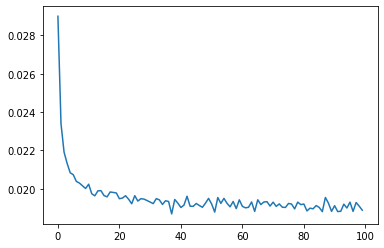

In [ ]:
# 아까 S0랑 K를 1로 설정해서? 잘 되는 것처럼 보임
#확인을 위해 밑에
plt.plot(hist.history['loss'])
#hist 변수에 history의 여러가지 값들이 저장되어 있다
#그 중에서 loss 부분이 얼마나 줄어드는가 확인
#꽤 줄어든다
plt.show()

32/32 [==============================] - 9s 22ms/step


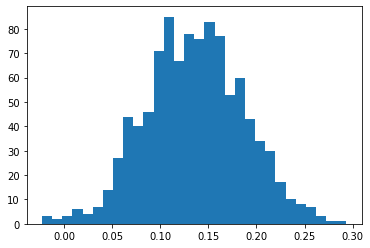

In [ ]:
plt.hist(model.predict(x), bins=30)
plt.show()

#0이 predict 되야 한다.
#왜냐하면 bs 옵션가격을 뺐으니까
#hist가 도 0에 가까울 수록 예측을 잘하는 것이다
#분산이 작으면서 0에 가까운
#

32/32 [==============================] - 1s 23ms/step


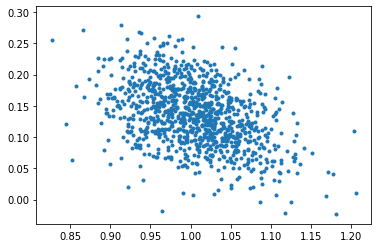

In [ ]:
#0에 가까워 보이는데 그래서 그 값들을 찍어보는 함수를 만들어보았다.
plt.plot(S[:,-1], model.predict(x), marker = ".", linestyle='none')
plt.show()
# V자 모양(iron condor?)으로 나오니까 option의 payoff가 섞여 나오는 것처럼 보였다
# 원래는 y축 0을 기준으로 모양이 나와야 잘 맞추는 건데
# 여기는 행사 가격이 1 일 때 마이너스이고 그것을 중심으로 퍼져있을 뿐이었다.
# 잘 못 맞춘거다!!
# 위에 tanh하나 밖에 안 통과하니까 잘 안움직이고 예측이 안되는것이다
# activation으로 leaky_relu로 해본다면 잘된다!!!! 원래는 tanh 였다.
#만기 시점 관점에서 만들어 본 것이다.
# 기초자산 관련 없이 당연히 0에 가까워야 헷지가 된 것이다.

# 풋옵션 쪽이면 왜 안되는 것인가? 콜옵션은 델타가 0~1이니까 괜찮았지만
# 풋업션은 델타가 -1~0이다!!! 그래서 마지막 activation sigmoid면 안된다!!
# linear로 그대로 받는 activation도 되고
# 풋옵션은 마지막 activation에 -1~1을 받는 tanh를 써보자
# 오른쪽이 이상하긴 한데 0을 중심으로 하긴 한다

#def 함수로 해봤는데 또 헷징이 잘 되었다

In [ ]:
# sigmoid 는 input이 뭐든 0~1의 값을 리턴해준다
# tanh는 -1~1 사의의 값을 리턴
# Relu는 옵션의 payoff와 유사한 모양
# leaky_relu는 Relu를 보고 얼마 이하이어도 영향을 0이 아니라 조금 주게끔
# 만들어 보았다! 가장 오차가 적게 나와본다. 다른 activation도 시도 가능